In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


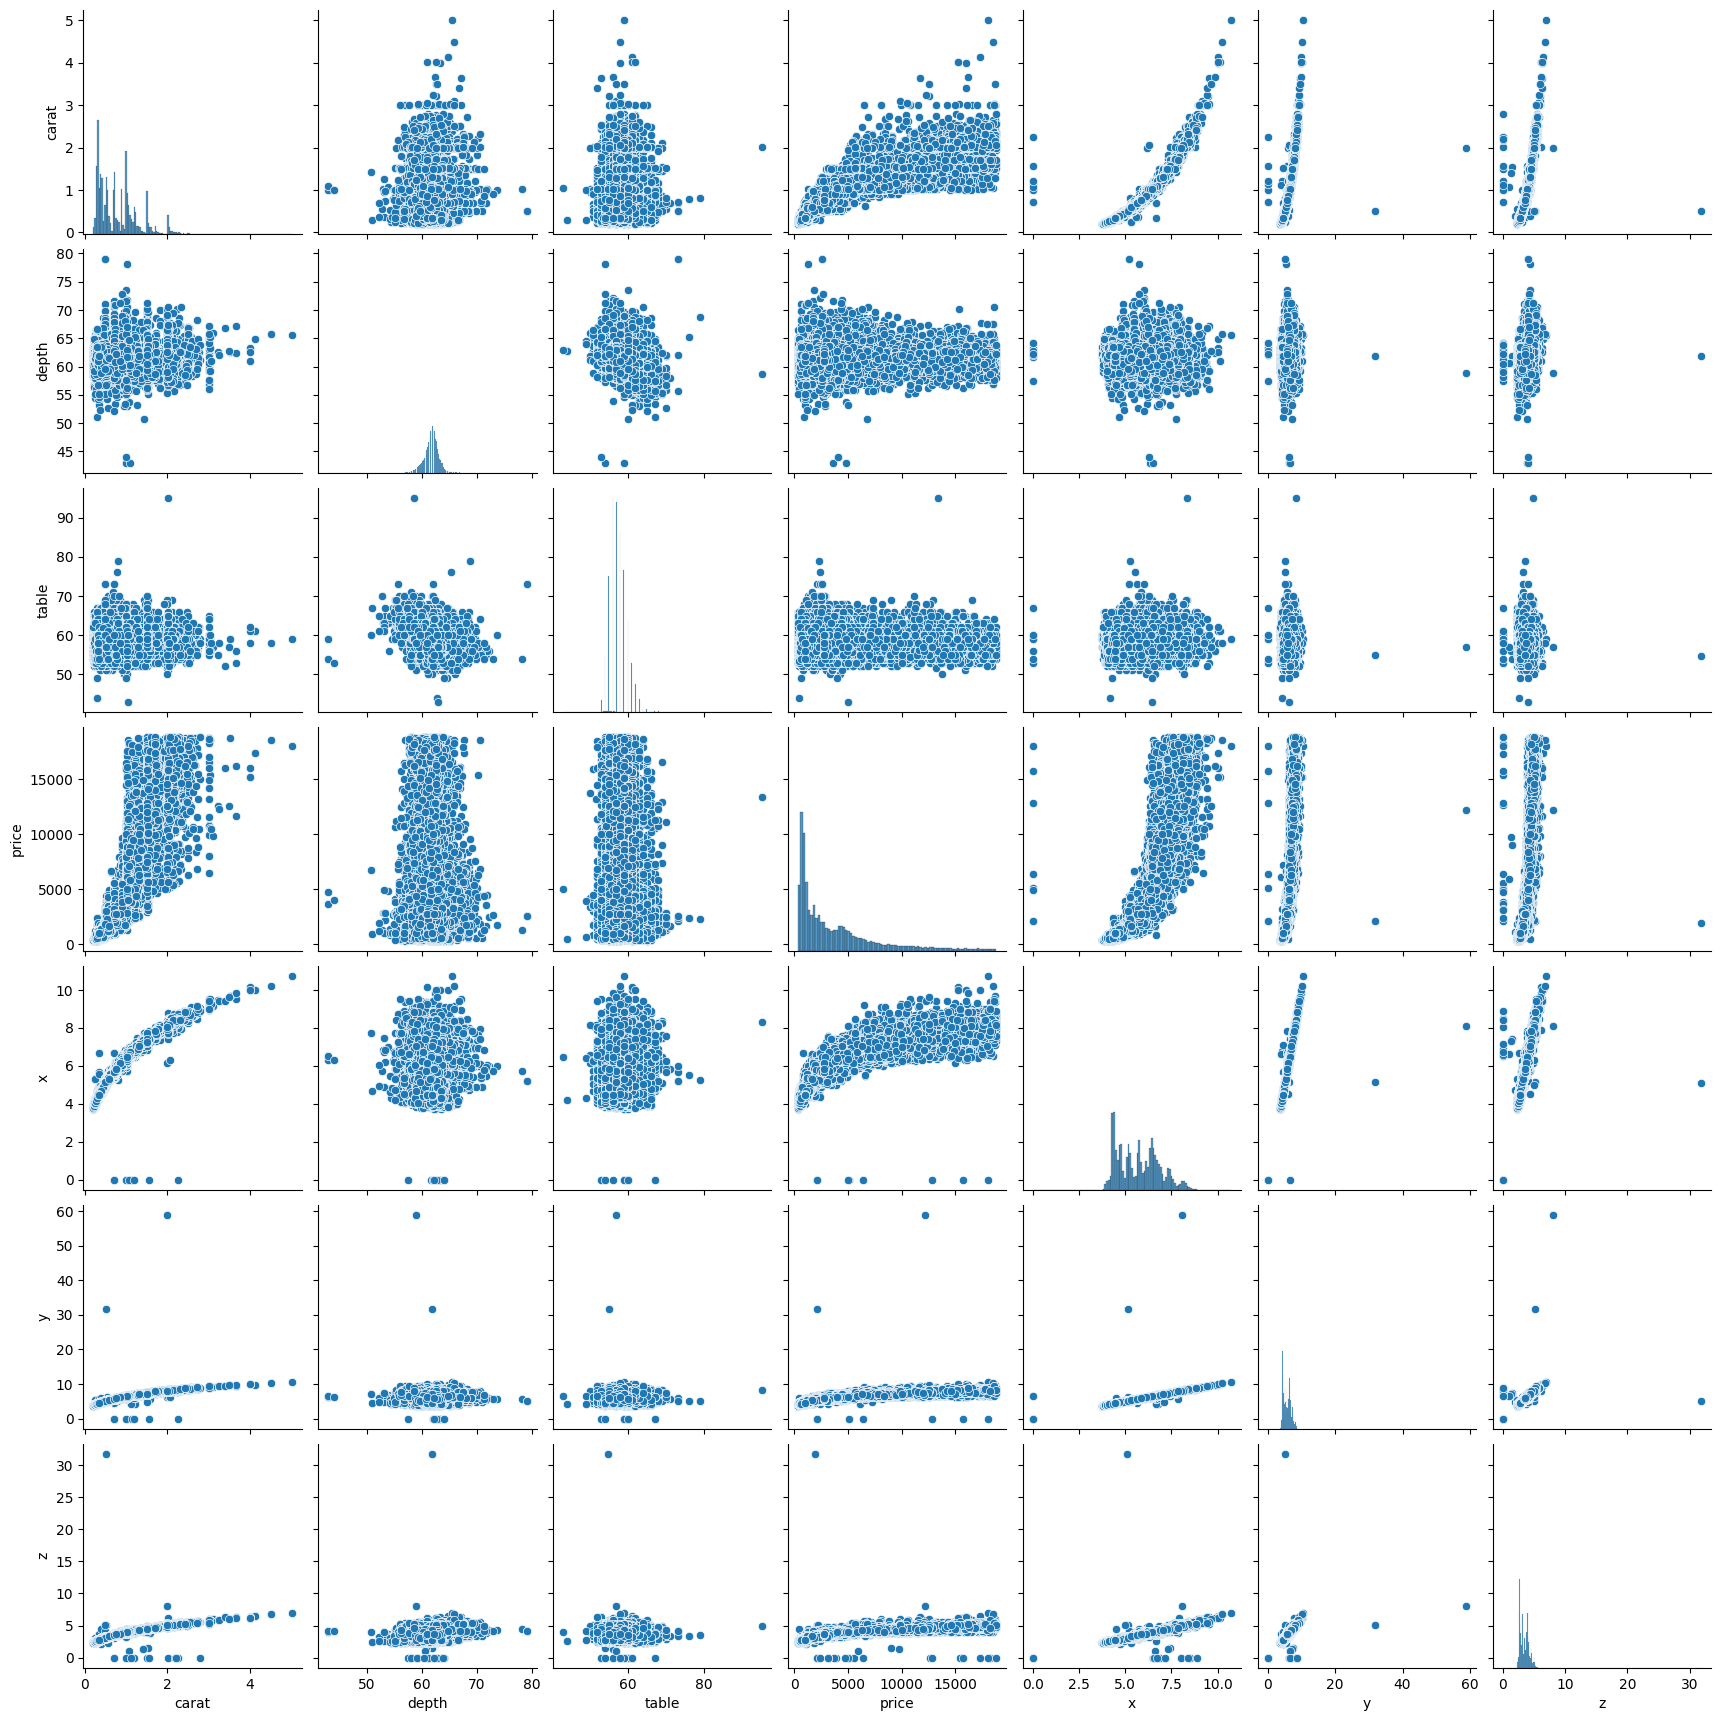

In [4]:
sns.pairplot(df[columns])

In [5]:
df[columns].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028266,0.181643,0.921593,0.975095,0.951724,0.953389
depth,0.028266,1.000000,-0.295735,-0.010613,-0.025252,-0.029301,0.094964
table,0.181643,-0.295735,1.000000,0.127155,0.195365,0.183783,0.150955
price,0.921593,-0.010613,0.127155,1.000000,0.884438,0.865425,0.861253
x,0.975095,-0.025252,0.195365,0.884438,1.000000,0.974702,0.970772
y,0.951724,-0.029301,0.183783,0.865425,0.974702,1.000000,0.952007
z,0.953389,0.094964,0.150955,0.861253,0.970772,0.952007,1.000000


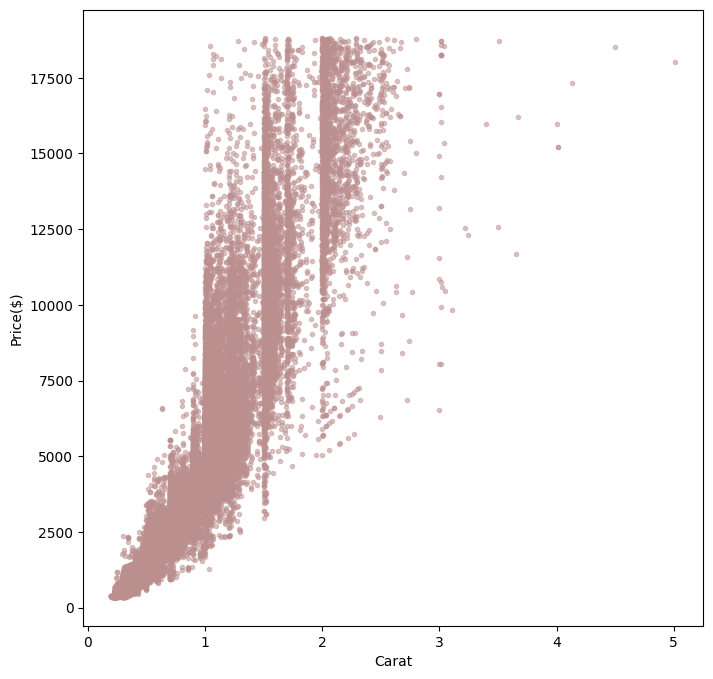

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(df['carat'], df['price'], color='RosyBrown', alpha=0.5, marker='.')
plt.xlabel('Carat')
plt.ylabel('Price($)')
plt.show()

In [7]:
Y = df['price']
X = sm.add_constant(df['carat']) # adds intercept!


In [8]:
X

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31
...,...,...
53936,1.0,0.72
53937,1.0,0.72
53938,1.0,0.70
53939,1.0,0.86


In [9]:
model = sm.OLS(Y, X) # must start with Y 
results = model.fit() # training process

In [10]:
results

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        05:29:33   Log-Likelihood:            -4.7274e+05
No. Observations:               53941   AIC:                         9.455e+05
Df Residuals:                   53939   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3385     13.055   -172.831      0.0

In [12]:
# equation of line of best fit -> price = m*carat + b
results.params # coefficients

const   -2256.338481
carat    7756.379377
dtype: float64

In [13]:
type(results.params)

pandas.core.series.Series

In [16]:
m = results.params['carat']
b = results.params['const']

In [17]:
carat = 1.5
price = m*carat + b

In [18]:
print(price)

9378.230584795818


In [23]:
# generate new possible diamonds
# random samples from uniform distribution
carats = np.random.uniform(low=0.5, high=2.5, size=20)

In [24]:
print(carats)

[0.84896891 0.65873895 1.78305848 0.91204504 0.57173146 1.28997917
 2.43956808 2.40300861 0.66698328 1.91099211 1.44404199 1.03078555
 1.68926095 1.32189345 2.27809337 2.02353217 0.58160887 2.00669287
 1.92189876 2.10493219]


In [25]:
prices = m*carats + b

In [26]:
print(prices)

[ 4328.5864531   2853.09070277 11573.73951121  4817.82885074
  2178.22759006  7749.22932328 16665.8770748  16382.30791477
  2917.03688491 12566.0413475   8944.19905278  5738.82530151
 10846.21027734  7996.76857985 15413.41796532 13438.94469112
  2254.84059158 13308.33273215 12650.63742689 14070.31411531]
